# Maximum Likelihood Estimation (MLE)



## Learning objectives



- Understand mathematically, what it means to find "optimal" parameters
- Derive MLE from scratch
- Quantify the confidence in a particular parameterisation
- Understand why we use the mean squared error loss function for regression tasks rather than say the absolute or quartic squared error



## Firstly, which of these is better?



<p align=center><img width=1200 src=images/mle_compare_dists.jpg></p>



## Data generating & empirical distribution



Imagine a dataset where every datapoint is the height of a person. 

Not all values of height appear in this dataset:
- It is very unlikely to include an example of someone whos height was 3 meters. 
- It is also unlikely to include examples of someone whos height is 0.3 meters.  
- We know that it's impossible for any value to be negative!

Why is this?

Not all heights are distributed to an equal number of people - some heights are more likely than others. We could describe this phenomena using **data generating distribution**, which from now on will be denoted by: 
$$
p_{true}
$$

Our dataset is **empirical distribution** which is a real life manifestation of data generating process. Say we have 100 people and their data. This is our **sample** on which we can calculate things like **mean**, **variance** and other properties of data generating distribution. We will denote it by:

$$
p_{data}
$$

There are also other distributions, visualised below.

<p align=center><img width=1200 src=images/dists.jpg></p>

Can you tell which of the colors represent which distributions in the image below?

<p align=center><img width=800 src=images/img-dists.jpg></p>



## Representativeness



We aim for our distribution to be **representative** which means it covers a lot of possible states generated by real distribution.



### Example



Let's say our **data generating distribution** can take values from `1` to `5` inclusive (denoted as `v` for values) and all those numbers have equal probability of being generated (so `p=0.2` for each value).

Now we would like to calculate the mean of such a distribution which would be:

$$
\mu = \sum_{i=1}^{5}v_ip_i = 3
$$

Now, let's say we have **empirical distribution** of this process. And our only data are two numbers: `[4, 5]`, and the calculated mean would be:
$$
\mu = 4.5
$$ 

 __which differs a lot from our true distribution__ which we want to approximate.

This is an example of __non-representative__ distribution, which has the following properties:
- __gives us false information about event__; because of that we will predict something different than we originally wanted
- __impossible to spot__; we can't know whether our empirical distribution is representative or not as __we have no access to true data generating distribution__



#### Is it representative?



One can never be certain. We can do something though: 
- Get as many samples as possible in order to make **empirical distribution** resemble **true distribution** as close as possible
- Check variety of our data; say our empirical distribution from above example would be `[1, 1, 1, 1, 1]`. It would be even worse than originally! On the other hand some generating processes do not vary a lot hence __try to judge samples based on your domain knowledge__



## How do models relate to those distributions?



### Classification



Classifiers predict probabilities of an example, $x$, belonging to a particular class.
Outputs of the model create another distribution ($\hat{p}$) __which tries to model targets from empirical distribution ($y$) given data of empirical distribution ($x$)__:

$$
    \hat{p}(y | x) \sim p(y)
$$

__Please note:__ $p(y)$ is equal to `1` for correct class and `0` for all incorrect classes.

__Additional:__ There are cases where $p(y) \neg 1$ for correct classes in classification (it can be `0.9` for example). This approach helps the model not to be too confident in it's predictions (see [label smoothing](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06))



### Example



Let's imagine a dataset of hand written digits from `0` to `9` (popular MNIST dataset).
Classifier should only return values from this range for each example. 

Instead of returning one value our model outputs a __vector__ of size __10__ containing probabilities of belonging to each class, for example:

$$
    [0.1, 0.05, 0.05, 0.7, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05]
$$

One can see `0.7` probability so our model predicts digit `3` in this case.
Doing this for all samples in dataset we obtain empirical distribution of $p_{model}$, which leads to conclusion that: 

__All our models approximate some distribution!__



### Regression



Regression models predict continuous values from a supervised dataset (unlike classification where the value was discrete). Otherwise the idea remains similiar.

Almost always distributions used to model empirical data are Gaussian. Following reasons can be given:
- fits many natural phenomena (dice throwing, human height, IQ tests)
- data with finite variance (almost always the case) turns more and more Gaussian when we allow it to grow

<p align=center><img width=800 src=images/regression.jpg></p>



## Before we really start, what is entropy?



Entropy (as a part of [Information Theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)))

> Entropy measures level of uncertaintity in our distribution

One can also name it as the level of information contained in source or "surprise" during each trial.

> Distribution with highest level of entropy is called `uniform` distribution. Why is that?



### Entropy formula



$$
H(X) = - \sum_{i=1}^n P(x_i)log(P(x_i))
$$



## What distribution best describes our data, and how can we quantify this?



> The maximum likelihood parameters of a distribution are those which parameterise a given distribution such that the probability of sampling the observed data from it is maximised.

<p align=center><img width=1000 src=images/mle_deriv.jpg></p>

The result of this derivation gives us a very important equation which we have seen before: the __cross entropy loss__.



## What is cross entropy?



We talked about cross-entropy before when we did multiclass logistic regression, here's the mathematical definition of the cross entropy between two distributions:

<p align=center><img width=1000 src=images/cross_entropy_definition.jpg></p>

Goodfellow et al. clarify further that 

>[...] any loss term that contains a negative log-likelihood is a cross entropy between the empirical distribution defined by the training set and the probability distribution defined by the model

What this means should become more obvious over the next few paragraphs.

## The KL divergence



The aim of machine learning is to be able to model things that we care about. 
We want to be able to know the distribution of:
- features (unsupervised problems)
- labels (supervised problems) that appear in the data.

Ideally we would like to know __true data generating distribution__. It is impossible hence we are left with __empirical data distribution__:

> Maximum likelihood **implicitly** minimises the difference between the empirical distribution $\hat{p}_{data}$ and the model distribution $p_{model}$.

This happens because what we minimise in a cross entropy loss, is the same term as that which appears in the equation for the **KL-divergence**, which:

> KL Divergence is a measure of the difference between two distributions

<p align=center><img width=1000 src=images/kl_definition.jpg></p>

There is much, much more to understand about the KL-divergence... let's look into it.



## Minimising the cross entropy implicitly minimises the KL divergence



<p align=center><img width=1000 src=images/kl_cross_entropy_argmin.jpg></p>

Throughout the rest of the course, we will try to minimise the expression produced from the above derivation of the MLE parameters, which is a __cross entropy between empirical distribution and our model distribution__.

This should make sense: our data that we want to model has some underlying distribution, and we want to build a model of the same distribution - so we will minimise their difference.

We'll do this by minimising the KL-divergence, which quantifies their difference.
But we don't actually have an expression for the empirical distribution which appears in the KL-divergence equation. So instead of minimising the KL-divergence directly, we minimise the cross entropy, which has the same minimum point.

The KL-divergence and the cross entropy are related by the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory))

<p align=center><img width=1000 src=images/kl_cross_entropy_shannon_entropy_relationship.jpg></p>



## Let's visualise some unsupervised data (no labels) so that we can try to fit a distribution to it using maximum likelihood.

First, run the following cell to get some helper functions

In [ ]:
!wget "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/get_colors.py" "https://aicore-files.s3.amazonaws.com/Data-Science/data_utils/utils.py"

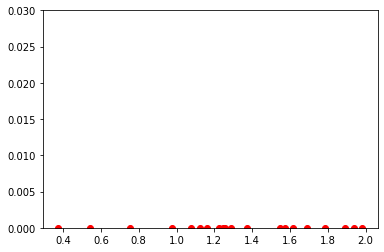

mean: 1.3208119017608309
standard deviation: 0.4351089077485842


In [4]:
# DON'T WORRY ABOUT THIS CELL, IT JUST SETS SOME STUFF UP
import numpy as np
import matplotlib.pyplot as plt
from utils import get_regression_data, show_regression_data

X, Y = get_regression_data()

X = X[:, 0]
# Y = np.zeros_like(Y)

plt.scatter(X, np.zeros(X.shape[0]), c='r')
plt.ylim(0, 0.03)
plt.show()

mu = np.mean(X)
sigma = np.std(X)
print('mean:', mu)
print('standard deviation:', sigma)


We will model our data with a Gaussian (normal distribution). Let's code one up now.

<p align=center><img src=images/gaussian.jpg width=800></p>

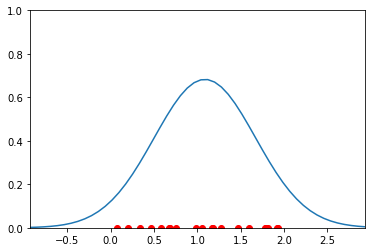

In [3]:
import numpy as np

class GaussianPDF:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        p_x = np.exp(-(x - self.mu)**2 / (2*self.sigma**2)) / ( np.sqrt(2*np.pi) * self.sigma) ## pdf equation for gaussian
        return p_x

p = GaussianPDF(mu, sigma)

p(0)
domain = np.linspace(min(X)-1, max(X)+1)
plt.plot(domain, p(domain))
plt.scatter(X, np.zeros(X.shape[0]), c='r')
plt.ylim(0, 1)
plt.xlim(min(domain), max(domain))
plt.show()

What is the central position (mean) of the Gaussian distribution which best describes the feature values of the data, assuming that they are normally distributed?

Let's test out different Gaussian distributions by evaluating the likelihood of our dataset being sampled from each of them, using the formula we derived above.

BEST VAL: -17.637918130177415
BEST MU: 1.096423061806837


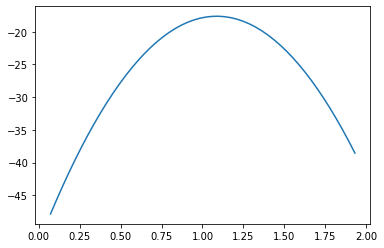

In [4]:
mus = np.linspace(min(X), max(X), 50)
objectives = np.zeros_like(mus)
best_mu = 0
best_val = -float('inf') # initialise best value as infinitely bad
for idx, m in enumerate(mus): ## enumerate over all of our mus
    p = GaussianPDF(m, sigma) ## initialise a gaussian
    obj = 0 ## initialise the objective as zero
    for x in X:
        obj += np.log(p(x)) # compute the log likelihood for this example and add it to the objective which we wish to maximise
    objectives[idx] = obj
    if obj > best_val:
        best_val = obj
        best_mu = m
    # print(obj)

print('BEST VAL:', best_val)
print('BEST MU:', best_mu)

plt.plot(mus, objectives)


## Now let's look at the supervised case



Let's now consider the case where our dataset contains labels as well as just example features.

We can follow the same steps to find an objective function for solving supervised regression problems. We simply model the conditional distribution over the labels given features, rather than modelling the distribution of features.

<p align=center><img src=images/supervised_mle.jpg width=800></p>

So for every input, we are going to have our model output a distribution, rather than a point estimate. 

We can do this by simply having our model output the parameters for a particular distribution over labels, such as the mean and variance of a Gaussian.

In this case we will assume that the variance of these distributions is fixed; it will not affect the argmax of the distribution anyway.



## The central limit theorem



Here, we assume that the distribution over labels **for a particular example** is Gaussian because of the [central limit theorem](https://www.youtube.com/watch?v=YAlJCEDH2uY).

> The central limit theorem tells us that the mean of a sample of the same measurement will be normally distributed, even if the individual measurements themselves are not normally distributed.

So even if an example's observed label is noisy and is affected by random error, the distribution of the mean of labels assigned to it over many attempts will still be normally distributed.

__For example__, if a human labelling hand-written digits clicks an incorrect label with uniformly random probability, the mean of the labels which they assign to this example will be normally distributed about the true mean.



## Visualise labels as distributions



For now let's assume that we are modelling the labels of a particular example with a normal distribution.

Below we will take Gaussians of a fixed size, and plot them over the y-axis, centred with their mean at the position of the true label for now. 
These Gaussians vary in the positive x-direction, from the feature value, by the probability that this distribution assigns to any given label value.

As mentioned, the Gaussians are fixed in size by having a constant standard deviation and are scaled down in size so that they can be visualised easily.

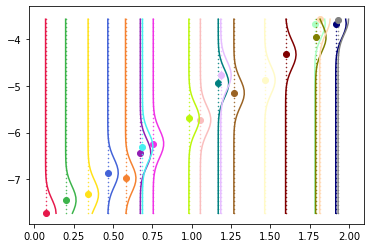

In [5]:
from get_colors import colors

def plot_dist(x, y, color='blue'):
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 0.3)
    distributions = 0.05*p(domain) # scale down the size of the distributions for visualisation purposes
    p_plot = distributions + x # place the distribution extending from the x position of the example which it corresponds to
    plt.plot(p_plot, domain, c=colors[i%len(colors)]) # plot each distribution of predicted labels against
    plt.scatter(np.ones_like(domain)*x, domain, c=colors[i%len(colors)], marker='.', s=1)

for i in range(len(X)):
    x = X[i]
    y = Y[i]
    domain = np.linspace(min(Y), max(Y))
    p = GaussianPDF(y, 1)
    plt.scatter(x, y, c=colors[i%len(colors)])
    plot_dist(x, y)
plt.show()


## Now let's actually use our model to produce these distributions over labels for each input example

Our model will probably not produce the same Gaussians because it will likely have some error in predicting the label (mean of the Gaussian) for each example.


[2.22322023]


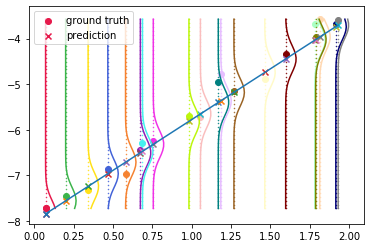

In [6]:
grad = (Y[-1] - Y[0]) / (X[-1] - X[0])
print(grad)

class LinearModel:
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def __call__(self, x):
        return self.b + self.w * x

model = LinearModel(grad, -8)

for i in range(len(X)):
    color = colors[i%len(colors)]
    if i == 0:
        plt.scatter(X[i], Y[i], c=color, label='ground truth')
        plt.scatter(X[i], model(X[i]), marker='x', c=color, label='prediction')
    plt.scatter(X[i], Y[i], c=color)
    plt.scatter(X[i], model(X[i]), marker='x')
    plot_dist(X[i], model(X[i]))
    plt.legend()
plt.plot(X, model(X))
plt.show()

## Linear regression as maximum likelihood



Previously we implemented a linear regression algorithm that made a point estimate of the label $y$ given an input $x$.
We chose to minimise the mean squared error somewhat arbitrarily. Why did we choose this as our criterion? Why not minimise the absolute error or the mean quadratic error?

We want to find the parameters of the model that we have defined that best describe the data. That is, the maximum likelihood parameters $\theta_{ML}$.
Somehow we need to link the probability distributions produced by our model parameterisation.

Let's revisit the linear regression algorithm from a perspective of maximum likelihood.

> Rather than predicting a point estimate, we now have the model predict a conditional probability distribution $p(y|x;\theta)$ over the label $y$ given $x$.

That means that our model is predicting the confidence of the label taking one of a range of possible values, rather than predicting the exact value, for each example input.

To yield the same linear regression learning algorithm, we assume that the distribution over labels for a given example is a Gaussian. Again, this is warranted by the central limit theorem.



## Deriving the mean squared error loss function from maximum likelihood



We know that maximum likelihood means maximising the probability of observing empirical data and __our model is a distribution__. Putting the equation for our assumedly Gaussian probability distribution into the objective that we defined earlier transforms it into the same objective that we minimised previously - the mean squared error.

<p align=center><img src=images/linear_reg_as_mle.jpg width=1200></p>

This should highlight why the MSE loss is what we optimise for, rather than any other arbitrary loss function such as absolute error (though there are cases where this approach helps).



## Challenges



- Imagine you can only have `10` integers values (`0` through `9`). What is the entropy for:
    - Uniform distribution
    - Normal distribution with center at `5` and standard deviation of `1`



## Summary



- Empirical distribution is a real life manifestation of our true data generating distribution
- The more samples in empirical distribution the better approximation of true distribution it should be
- Gaussian distribution describes well many real life phenomena. It is reasonable that working with real life data we assume it's Gaussian (even if this is not always the case)
- The more samples we have, the more likely they are to be Gaussian distributed according to Central Limit Theorem
- Maximum Likelihood Estimation is a procedure for finding parameters that best describe a set of data
- The reason that we minimise MSE is because it is the objective function produced by plugging a Gaussian distribution into the `maximum likelihood objective`